In [2]:
import numpy as np

In [3]:
import pandas

In [4]:
import scipy

In [5]:
import nltk
from nltk.corpus import stopwords

In [6]:
import sklearn

In [7]:
from sklearn import datasets

In [8]:
import pandas as pd

Predicting first (SVC):
[3 1 2 3 1 2 3 2 3 3 2 2 1 2 2]
0.8
Predicting second (SVC):
[1 3 3 3 1 2 3 3 3 3 1 1 2 3 2]
0.866666666667
[3 3 1 ..., 3 3 3]
[2 3 3 ..., 3 3 2]
97
118
1088
48
35
286
261
196
1080


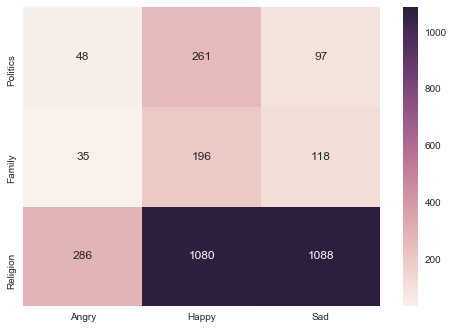

In [9]:
df1 = pd.read_csv("happyedited.txt")
df2 = pd.read_csv("sadedited.txt")
df3 = pd.read_csv("angry.txt")
df4 = pd.read_csv("politics.txt")
df5 = pd.read_csv("family.txt")
df6 = pd.read_csv("religion.txt")
df7 = pd.read_csv("Topic.csv")
df8 = pd.read_csv("Emotion.csv")
df9=pd.read_csv("@Oprah_tweets.csv")

df1.columns = ["happywords"]
df2.columns = ["sadwords"]
df3.columns = ["angrywords"]
df4.columns = ["politicswords"]
df5.columns = ["familywords"]
df6.columns = ["religionwords"]
df7.columns = ["A", "B", "datetime", "D", "users", "tweets", "category"]
df8.columns = ["A", "B", "datetime", "D", "users", "tweets", "category"]
df9.columns=["ID", "Date", "tweets"]

tweetsEmotion = df8["tweets"]
tweetsCategoryEmotion = df8["category"]
happyemotion = df1["happywords"]
sademotion = df2["sadwords"]
angryemotion = df3["angrywords"]
tweetsToPredict=df9["tweets"]

tweetsTopic = df7["tweets"]
tweetsCategoryTopic = df7["category"]
politicstopic = df4["politicswords"]
familytopic = df5["familywords"]
religiontopic = df6["religionwords"]

elementsEmotion = []
n=0
for tweet in tweetsEmotion:
    tweet =' '.join([word for word in tweet.split() if word not in stopwords.words("english")])
    n = n+1
    happyNumber=0
    sadNumber=0
    angryNumber=0
    count=0
    happyNumber = sum([1 if happyword in tweet else 0 for happyword in happyemotion])
    sadNumber = sum([1 if sadword in tweet else 0 for sadword in sademotion])
    angryNumber = sum([1 if angryword in tweet else 0 for angryword in angryemotion])
    count=len(tweet)
    if tweet.count('@') > 0:
        elementsEmotion.append([happyNumber, sadNumber, angryNumber, 1, 0, count])
    else:
        elementsEmotion.append([happyNumber, sadNumber, angryNumber, 0, 1, count])
elementsCategoryEmotion = []
a3 = []
for category in tweetsCategoryEmotion:
    if (category=="sad"):
        a3.append(1)
    if (category=="anger"):
        a3.append(2)
    if (category=="happy"):
        a3.append(3)
        
#print("Printing emotion arrays:")
#print(elementsEmotion) 
#print("Printing emotion category arrays:")
#print(a3)
n=0
elementsTopic = []
for tweet in tweetsTopic:
    n = n+1
    tweet =' '.join([word for word in tweet.split() if word not in stopwords.words("english")])
    politicNumber=0
    familyNumber=0
    religionNumber=0
    count=0
    politicNumber = sum([1 if politicsword in tweet else 0 for politicsword in politicstopic])
    familyNumber = sum([1 if familyword in tweet else 0 for familyword in familytopic])
    religionNumber = sum([1 if religionword in tweet else 0 for religionword in religiontopic])
    count= len(tweet)
    if tweet.count('@') > 0:
        elementsTopic.append([politicNumber, familyNumber, religionNumber, 1, 0, count])
    else:
        elementsTopic.append([politicNumber, familyNumber, religionNumber, 0, 1, count])
elementsCategoryTopic = []
a4 = []
for category in tweetsCategoryTopic:
    if (category=="Politics"):
        a4.append(1)
    if (category=="family"):
        a4.append(2)
    if (category=="religion"):
        a4.append(3)
#print("")
#print("Printing topic arrays:")
#print(elementsTopic)
#print("Printing topic category arrays:")
#print(elementsCategoryTopic)

from sklearn.metrics import accuracy_score
print("Predicting first (SVC):")
#Remove the shuffles to make it easier to visualize how well the code is working.
from sklearn.utils import shuffle
elementsEmotion, a3 = shuffle(elementsEmotion, a3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    elementsEmotion, a3, test_size=0.10, random_state=4)

from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train,y_train)
array1 = (svc.predict(X_test))
print(array1)
print(accuracy_score(y_test, array1))

print("Predicting second (SVC):")
#Remove the shuffles to make it easier to visualize how well the code is working.
from sklearn.utils import shuffle
elementsTopic, a4 = shuffle(elementsTopic, a4)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    elementsTopic, a4, test_size=0.10, random_state=4)

newsvc = svm.SVC(kernel='linear')
newsvc.fit(X_train2,y_train2)
array2 = (newsvc.predict(X_test2))
print(array2)
print(accuracy_score(y_test2, array2))

from sklearn.externals import joblib
#Saving methods.
#joblib.dump(svc, 'svcemotion.pkl')
#joblib.dump(newsvc, 'svctopic.pkl')
#svc = joblib.load('svcemotion.pkl')
#newsvc = joblib.load('svctopic.pkl') 


elementsEmotion2 = []
n=0
for tweet in tweetsToPredict:
    tweet =' '.join([word for word in tweet.split() if word not in stopwords.words("english")])
    n = n+1
    happyNumber=0
    sadNumber=0
    angryNumber=0
    count=0
    #for word in politicstopic:
     #   if word in tweet:
      #      if n<100:
       #         print(tweet)
        #        print(word)
    happyNumber = sum([1 if happyword in tweet else 0 for happyword in happyemotion])
    sadNumber = sum([1 if sadword in tweet else 0 for sadword in sademotion])
    angryNumber = sum([1 if angryword in tweet else 0 for angryword in angryemotion])
    count=len(tweet)
    if tweet.count('@') > 0:
        elementsEmotion2.append([happyNumber, sadNumber, angryNumber, 1, 0, count])
    else:
        elementsEmotion2.append([happyNumber, sadNumber, angryNumber, 0, 1, count])
        
n=0
elementsTopic2 = []
for tweet in tweetsToPredict:
    n = n+1
    tweet =' '.join([word for word in tweet.split() if word not in stopwords.words("english")])
    politicNumber=0
    familyNumber=0
    religionNumber=0
    count=0
    
    politicNumber = sum([1 if politicsword in tweet else 0 for politicsword in politicstopic])
    familyNumber = sum([1 if familyword in tweet else 0 for familyword in familytopic])
    religionNumber = sum([1 if religionword in tweet else 0 for religionword in religiontopic])
    count= len(tweet)
    if tweet.count('@') > 0:
        elementsTopic2.append([politicNumber, familyNumber, religionNumber, 1, 0, count])
    else:
        elementsTopic2.append([politicNumber, familyNumber, religionNumber, 0, 1, count])

array5new = (svc.predict(elementsEmotion2))
print(array5new)

array6new = newsvc.predict(elementsTopic2)
print(array6new)

a = np.array(array5new)
b = np.array(array6new)
c = np.column_stack((a,b))

sadpoliticsnum=0
sadfamilynum=0
sadreligionnum=0

angerpoliticsnum=0
angerfamilynum=0
angerreligionnum=0

happypoliticsnum=0
happyfamilynum=0
happyreligionnum=0

for item in c:
    if np.array_equal(item, [1, 1]):
        #print("sad politics")
        sadpoliticsnum+=1
    if np.array_equal(item, [1, 2]):
        #print("sad family")
        sadfamilynum+=1
    if np.array_equal(item, [1, 3]):
        #print("sad religion")
        sadreligionnum+=1
    if np.array_equal(item, [2, 1]):
        #print("anger politics")
        angerpoliticsnum+=1
    if np.array_equal(item, [2, 2]):
        #print("anger family")
        angerfamilynum+=1
    if np.array_equal(item, [2, 3]):
        #print("anger religion")
        angerreligionnum+=1
    if np.array_equal(item, [3, 1]):
        #print("happy politics")
        happypoliticsnum+=1
    if np.array_equal(item, [3, 2]):
        #print("happy family")
        happyfamilynum+=1
    if np.array_equal(item, [3, 3]):
        #print("hapy religion")
        happyreligionnum+=1
        
        
print(sadpoliticsnum)
print(sadfamilynum)
print(sadreligionnum)

print(angerpoliticsnum)
print(angerfamilynum)
print(angerreligionnum)

print(happypoliticsnum)
print(happyfamilynum)
print(happyreligionnum)

allnumarray = [sadpoliticsnum, sadfamilynum, sadreligionnum, angerpoliticsnum, angerfamilynum, angerreligionnum, happypoliticsnum, happyfamilynum, happyreligionnum]
sadarray = [sadpoliticsnum, sadfamilynum, sadreligionnum]
angerarray = [angerpoliticsnum, angerfamilynum, angerreligionnum]
happyarray = [happypoliticsnum, happyfamilynum, happyreligionnum]

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Sad': sadarray, 'Angry': angerarray,'Happy': happyarray})
sns.heatmap(df, annot=True, yticklabels=["Politics","Family","Religion"], fmt='g')
#plt.savefig('trumptweets.pdf', format='pdf', dpi=200)
plt.show()
